Mittelwert: 58.75 Fehler: 4.12673574592
Fitparameter:
A = 843.432554597 , Standartfehler = 16.5172803123
l = 0.000228047531631 , Standartfehler = 1.29175322067e-05

chi2 = 39.1157557824
chi2 red = 1.70068503402
Fitwahrscheinlichkeit = 2.0 %


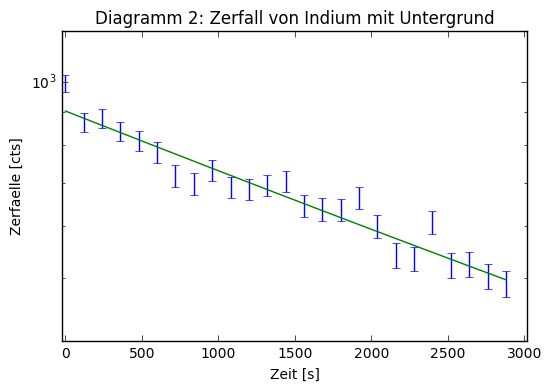

In [38]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

#Bestimmung der Zerfallskonstanten von Indium, Messdauer 3000s
M = np.loadtxt('/home/jan/Dokumente/SS 2018/PAP 2.2/V252/Indium.dat', usecols = [1])
fehler_M = np.sqrt(M)

B = np.loadtxt('/home/jan/Dokumente/SS 2018/PAP 2.2/V252/background.dat', usecols = [1])
backgd = 12*np.mean(B)
fehler_backgd = 12*np.std(B)/np.sqrt(len(B))
print('Mittelwert:', backgd, 'Fehler:', fehler_backgd)

t = np.arange(0, 3000, 120)

y = backgd #mit background

#fit der Zerfallsfunktion
def fitfunction(t,A,l):
    return A*np.exp(-t*l) + y

from scipy.optimize import curve_fit

popt, pcov=curve_fit(fitfunction, t[0:], M[0:], p0 = [500, 0.02], sigma = fehler_M)

#hier wird der erste stark abweichende Wert ausgeschlossen!
#er wird nur für den fit ausgeschlossen, aber trotzdem geplottet

plt.errorbar(t, M, fehler_M, linestyle = 'None')

plt.xlabel('Zeit [s]')
plt.ylabel('Zerfaelle [cts]')
plt.title('Diagramm 2: Zerfall von Indium mit Untergrund')
plt.yscale('log')
plt.ylim(4*10**2, 1.2*10**3)
plt.xlim(-20, 3020)
plt.plot(t, fitfunction(t, *popt))

#Ausgabe der Fitparameter

print("Fitparameter:")
print("A =", popt[0], ", Standartfehler =", np.sqrt(pcov[0][0]))
print("l =", popt[1], ", Standartfehler =", np.sqrt(pcov[1][1]))
print()

#Chi2-Summe

chi2_ = np.sum((fitfunction(t, *popt)-M)**2/fehler_M**2)
dof2 = len(M) - 2 #Anzahl Freiheitsgrade
chi_2red = chi2_/dof2
print("chi2 =", chi2_)
print("chi2 red =", chi_2red)

#fitwahrscheinlichkeit

from scipy.stats import chi2

prob2 = round(1-chi2.cdf(chi2_, dof2), 2)*100
print("Fitwahrscheinlichkeit =", prob2, "%")

plt.savefig('/home/jan/Dokumente/SS 2018/PAP 2.2/V252/V252_diagr2.pdf')

In [29]:
#(a) Subtraktion des 1sigma-Fehlers

y = backgd - fehler_backgd

popt_m, pcov_m = curve_fit(fitfunction, t[0:], M[0:], p0 = [500, 0.02], sigma = fehler_M)

print("Fitparameter:")
print("A- =", popt_m[0], ", Standartfehler =", np.sqrt(pcov_m[0][0]))
print("l- =", popt_m[1], ", Standartfehler =", np.sqrt(pcov_m[1][1]))
print()

Fitparameter:
A- = 847.38185438 , Standartfehler = 16.5078755799
l- = 0.000226497977608 , Standartfehler = 1.2832879756e-05



In [30]:
#(b) Addition des 1sigma-Fehlers

y = backgd + fehler_backgd

popt_p, pcov_p = curve_fit(fitfunction, t[0:], M[0:], p0 = [500, 0.02], sigma = fehler_M)

print("Fitparameter:")
print("A+ =", popt_p[0], ", Standartfehler =", np.sqrt(pcov_p[0][0]))
print("l+ =", popt_p[1], ", Standartfehler =", np.sqrt(pcov_p[1][1]))
print()

Fitparameter:
A+ = 839.485541368 , Standartfehler = 16.5268609717
l+ = 0.000229618318474 , Standartfehler = 1.30033873655e-05



l = 0.000228047531631 , Standartfehler = 1.56017044187e-06
Lebensdauer In-116 = ( 4385.0507517 +- 30.0000027187 ) s
Halbwertszeit In-116 = ( 3039.48556515 +- 20.7944173012 ) s


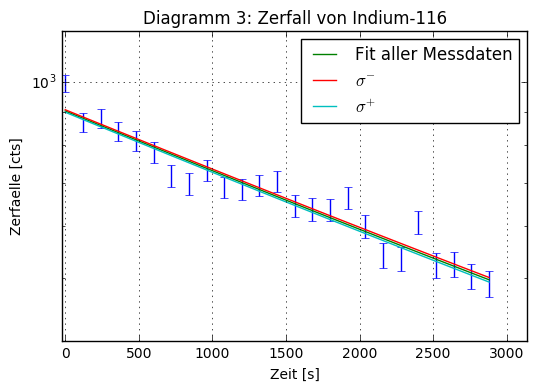

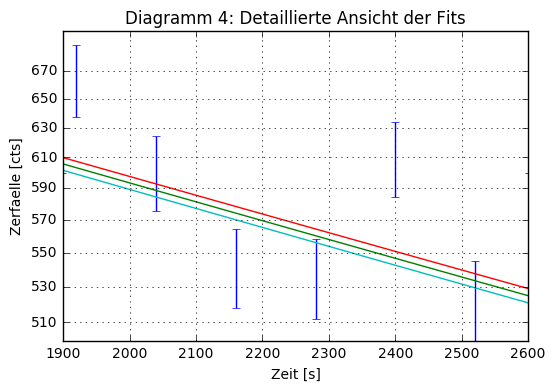

In [49]:
#Differenzen der Zerfallskonstanten

difflm = np.abs(popt[1] - popt_m[1]) #Berechne Differenzen
difflp = np.abs(popt[1] - popt_p[1])

diffmean = 0.5*(difflm+difflp) #Mittelwert der Differenzen

l_err = np.sqrt(pcov[1][1]**2 + diffmean**2) #quadratische Fehleraddition

print("l =", popt[1], ", Standartfehler =", l_err)

#Lebensdauer und Halbwertszeit von Indium-116

lt = 1/popt[1] #Berechnung der Lebensdauer mit Fehler
lt_err = lt*l_err/popt[1]

hl = np.log(2)/popt[1]
hl_err = hl*l_err/popt[1]

print("Lebensdauer In-116 = (", lt, "+-", lt_err ,") s")
print("Halbwertszeit In-116 = (", hl, "+-", hl_err, ") s")

#Plot

t = np.arange(0, 3000, 120)


#Definition Zerfallsfkt. mit gefitteten Parametern

def zerfall_minus(t):
    return popt_m[0]*np.exp(-t*popt_m[1]) + y
def zerfall_plus(t):
    return popt_p[0]*np.exp(-t*popt_p[1]) + y

plt.figure(0)
plt.errorbar(t, M, fehler_M, linestyle = 'None')

plt.plot(t, fitfunction(t, *popt), label ='Fit aller Messdaten')
plt.plot(t, zerfall_minus(t), label ='$\sigma^{-}$')
plt.plot(t, zerfall_plus(t), label ='$\sigma^{+}$')
plt.legend(loc = 'best')

plt.xlabel('Zeit [s]')
plt.ylabel('Zerfaelle [cts]')
plt.title('Diagramm 3: Zerfall von Indium-116')
plt.yscale('log')
plt.xlim(-20, 3140)
plt.ylim(4e2, 1.2e3)
plt.grid()

plt.show()
plt.savefig('/home/jan/Dokumente/SS 2018/PAP 2.2/V252/V252_diagr3.pdf')

#Plotte zoom-in um geringfügige Abweichungen zu zeigen

plt.figure(1)
plt.errorbar(t, M, fehler_M, linestyle = 'None')
plt.plot(t, fitfunction(t, *popt), label ='Fit aller Messdaten')
plt.plot(t, zerfall_minus(t), label ='$\sigma^{-}$')
plt.plot(t, zerfall_plus(t), label ='$\sigma^{+}$')

plt.xlabel('Zeit [s]')
plt.ylabel('Zerfaelle [cts]')
plt.title('Diagramm 4: Detaillierte Ansicht der Fits')
plt.yscale('log')
plt.xlim(1900, 2600)
plt.ylim(5e2, 7e2)
plt.grid()
plt.yticks(np.arange(5.1e2,6.9e2,0.2e2), np.arange(510,690,20))
plt.show()

plt.savefig('/home/jan/Dokumente/SS 2018/PAP 2.2/V252/V252_diagr4.pdf')